# Project : Building Classification Model for IRIS dataset using ANN

## Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.isna().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df.species)
df["Labels"] = pd.DataFrame(encoded)

In [10]:
# split the data into X,Y
X = df.drop(["species","Labels"],axis=1)
Y = df.Labels

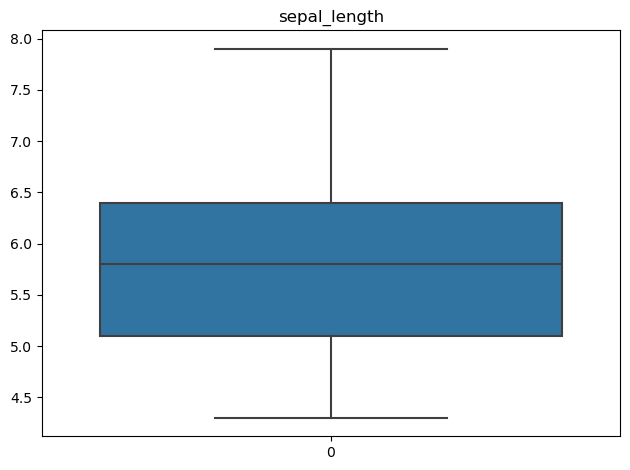

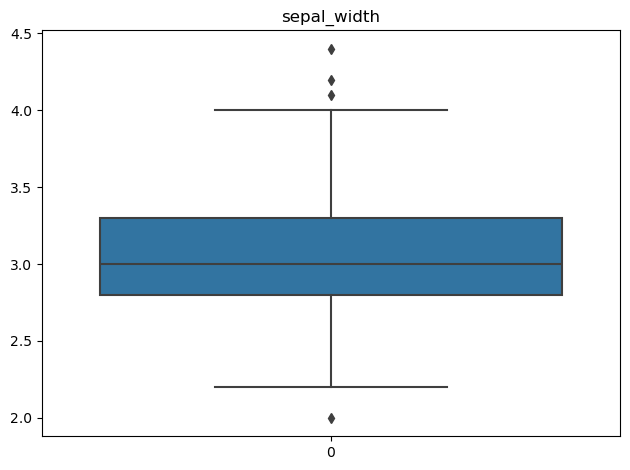

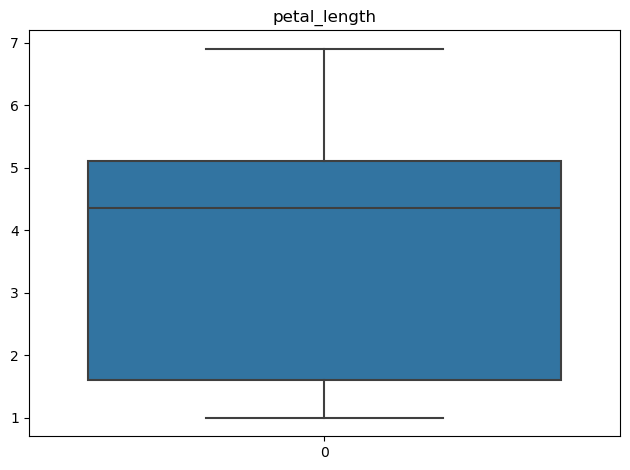

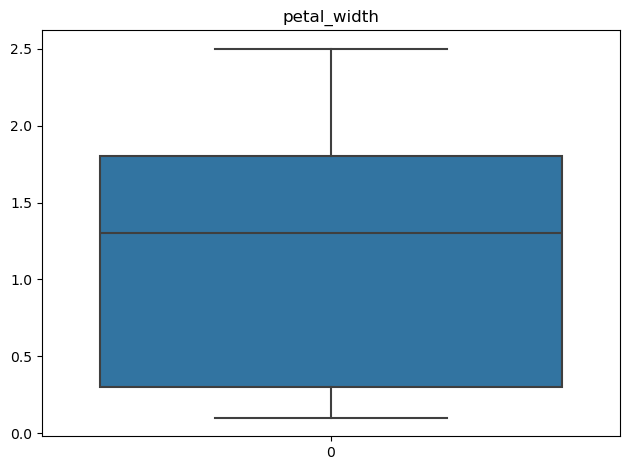

In [11]:
# box plot to know the outliers
columns = X.columns
for column in columns:
    sns.boxplot(df[column])
    plt.title(column)
    plt.tight_layout()
    plt.show()

In [12]:
X.info(),Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Labels
Non-Null Count  Dtype
--------------  -----
150 non-null    int32
dtypes: int32(1)
memory usage: 732.0 bytes


(None, None)

In [13]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size =0.2, random_state=7)

In [14]:
print(f"train_x : {train_x.shape}")
print(f"train_y : {train_y.shape}")
print(f"test_x : {test_x.shape}")
print(f"test_y : {test_y.shape}")

train_x : (120, 4)
train_y : (120,)
test_x : (30, 4)
test_y : (30,)


## Building a Machine Learning Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
ml_model = RandomForestClassifier(min_samples_split=4,n_estimators=200,max_depth = 3)
ml_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=3, min_samples_split=4, n_estimators=200)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(train_y,ml_model.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        38
           2       1.00      0.95      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [18]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 149 to 140
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  30 non-null     float64
 1   sepal_width   30 non-null     float64
 2   petal_length  30 non-null     float64
 3   petal_width   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [19]:
test_y.info()

<class 'pandas.core.series.Series'>
Int64Index: 30 entries, 149 to 140
Series name: Labels
Non-Null Count  Dtype
--------------  -----
30 non-null     int32
dtypes: int32(1)
memory usage: 360.0 bytes


In [20]:
print(classification_report(test_y,ml_model.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# Building ANN Model

In [21]:
import keras
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Dense

In [22]:
classifier = Sequential()

In [23]:
classifier.add(Dense(units=6,kernel_initializer = "he_uniform",activation="relu",input_dim = 4))
classifier.add(Dense(units=6, kernel_initializer ="he_uniform" ,activation="relu"))
classifier.add(Dense(units=3,kernel_initializer = "glorot_uniform",activation ="softmax"))
classifier.compile(optimizer = "adamax",loss="categorical_crossentropy",metrics=["accuracy"])

In [24]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
from keras.utils import to_categorical

train_y_encoded = to_categorical(train_y, num_classes=3)
test_y_encoded = to_categorical(test_y,num_classes=3)


In [26]:
model_history = classifier.fit(train_x,train_y_encoded,validation_split=0.2,batch_size=10,epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4030 - loss: 1.1406 - val_accuracy: 0.3333 - val_loss: 1.2755
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4871 - loss: 1.0892 - val_accuracy: 0.3750 - val_loss: 1.2331
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5974 - loss: 1.0772 - val_accuracy: 0.3750 - val_loss: 1.1984
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5818 - loss: 1.1234 - val_accuracy: 0.3750 - val_loss: 1.1732
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6329 - loss: 1.0953 - val_accuracy: 0.4167 - val_loss: 1.1537
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6897 - loss: 1.0325 - val_accuracy: 0.5000 - val_loss: 1.1369
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6190 - loss: 1.1161 - val_accuracy: 0.4583 - val_loss: 1.1220
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6568 - loss: 1.0727 - val_accuracy: 0.4583 - 

In [30]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


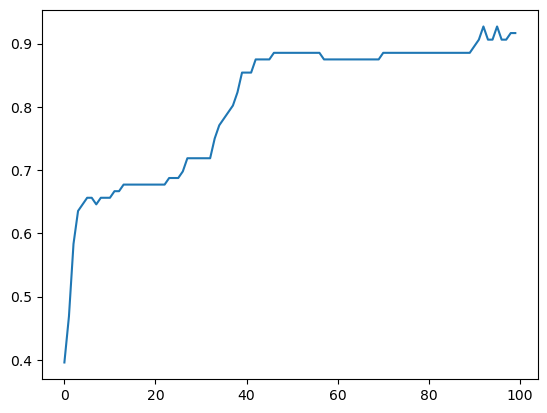

In [31]:
plt.plot(model_history.history["accuracy"])

In [32]:
test_predictions = classifier.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [34]:
predictions = np.argmax(test_predictions, axis=1)


In [37]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.42      0.59        12
           2       0.61      1.00      0.76        11

    accuracy                           0.77        30
   macro avg       0.87      0.81      0.78        30
weighted avg       0.86      0.77      0.75        30



#  Using Keras Tuner for Hyper Parameter Tuning

In [ ]:
!pip install keras_tuner

In [42]:
from keras_tuner import RandomSearch
from keras import layers

In [47]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int("num_layers",2,20)):
        model.add(layers.Dense(units=hp.Int("units_"+str(i),min_value=3,max_value=512,step=20),activation="relu"))
    model.add(layers.Dense(units=3,activation="softmax"))
    model.compile(
    optimizer =keras.optimizers.Adam(
    hp.Choice("learning_rate",[1e-1,1e-2,1e-3,1e-4])),
    loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

In [58]:
Tuner = RandomSearch(
    build_model,
    objective =  "val_accuracy",
    max_trials = 10,
    executions_per_trial=5,
    directory="project",
    project_name="iris classifier" )

Reloading Tuner from project\iris classifier\tuner0.json


In [59]:
Tuner.search(train_x,train_y_encoded,epochs=10,validation_data=(test_x,test_y_encoded),verbose=1)

Trial 10 Complete [00h 01m 46s]
val_accuracy: 0.35333333909511566

Best val_accuracy So Far: 0.9866666674613953
Total elapsed time: 00h 45m 35s


In [64]:
Tuner.results_summary()

Results summary
Results in project\iris classifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
num_layers: 4
units_0: 463
units_1: 143
learning_rate: 0.001
units_2: 303
units_3: 163
units_4: 43
units_5: 323
units_6: 303
units_7: 483
units_8: 243
units_9: 423
units_10: 43
units_11: 223
units_12: 103
units_13: 503
Score: 0.9866666674613953

Trial 07 summary
Hyperparameters:
num_layers: 6
units_0: 23
units_1: 183
learning_rate: 0.001
units_2: 483
units_3: 363
units_4: 323
units_5: 163
units_6: 363
units_7: 283
units_8: 23
units_9: 263
units_10: 263
units_11: 143
units_12: 263
units_13: 23
Score: 0.9599999904632568

Trial 02 summary
Hyperparameters:
num_layers: 14
units_0: 263
units_1: 323
learning_rate: 0.001
units_2: 103
units_3: 363
units_4: 363
units_5: 283
units_6: 203
units_7: 203
units_8: 283
units_9: 203
units_10: 243
units_11: 363
units_12: 443
units_13: 23
Score: 0.6333333253860474

Trial 04 summary
Hyperparameters:
nu

In [65]:
best_model= Tuner.get_best_models(num_models=1)[0]

In [66]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 463)                 │           2,315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 143)                 │          66,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 303)                 │          43,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 163)                 │          49,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             492 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,343 (634.15 KB)

 Trainable params: 162,343 (634.15 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
test_predictions=best_model.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [70]:
predictions = np.argmax(test_predictions,axis=1)

In [74]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,predictions)*100)

100.0


In [78]:
train_predictions = best_model.predict(train_x)
train_predictions = np.argmax(train_predictions,axis=1)
print(classification_report(train_y,train_predictions))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        38
           2       0.95      0.95      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [89]:
# Testing with new datapoint
input_data = {
    "sepal_length":[5.1],
    "sepal_width":[3.5],
    "petal_length":[1.4],
    "petal_width":[0.2]}
input_x = pd.DataFrame(input_data)

prediction = best_model.predict(input_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [92]:
prediction_class_index = np.argmax(prediction,axis=1)

In [93]:
label = encoder.inverse_transform(prediction_class_index)

In [96]:
print(label[0])

setosa


In [100]:
def predict(data):
    if len(data) == 4:
        input = pd.DataFrame(data)
        prediction = best_model.predict(input)
        prediction_class = np.argmax(prediction,axis=1)
        predicted_class = encoder.inverse_transform(prediction_class)
        return predicted_class[0]
    else:
        return None


In [101]:
prediction = predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [102]:
print(prediction)

setosa


# Saving the model

In [103]:
best_model.save("iris_classification_model.h5")

In [104]:
import joblib
joblib.dump(encoder,"encoder.pkl")

['encoder.pkl']

In [111]:
df.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species,Labels
81,5.5,2.4,3.7,1.0,versicolor,1
24,4.8,3.4,1.9,0.2,setosa,0
45,4.8,3.0,1.4,0.3,setosa,0
69,5.6,2.5,3.9,1.1,versicolor,1
46,5.1,3.8,1.6,0.2,setosa,0
58,6.6,2.9,4.6,1.3,versicolor,1
25,5.0,3.0,1.6,0.2,setosa,0
73,6.1,2.8,4.7,1.2,versicolor,1
66,5.6,3.0,4.5,1.5,versicolor,1
129,7.2,3.0,5.8,1.6,virginica,2
